# Practical 20 - Calculate degree, closeness, and eigenvector centrality for nodes in the social graph. Interpret the significance.

In [ ]:
import networkx as nx
import pandas as pd

In [ ]:
G = nx.erdos_renyi_graph(n=30, p=0.15, seed=42)

In [ ]:
# 1. Degree Centrality
deg_centrality = nx.degree_centrality(G)

# 2. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 3. Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# 4. Combine all into a DataFrame for easy viewing
centrality_df = pd.DataFrame({
    'Degree Centrality': deg_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
}).round(3)

# Sort by eigenvector centrality for influence
centrality_df = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False)

# Display top 5 influential nodes
print("Top 5 Most Influential Nodes:\n")
print(centrality_df.head(5))

Top 5 Most Influential Nodes:

    Degree Centrality  Closeness Centrality  Eigenvector Centrality
0               0.241                 0.475                   0.315
13              0.207                 0.468                   0.299
28              0.207                 0.492                   0.295
20              0.172                 0.453                   0.256
8               0.172                 0.468                   0.252


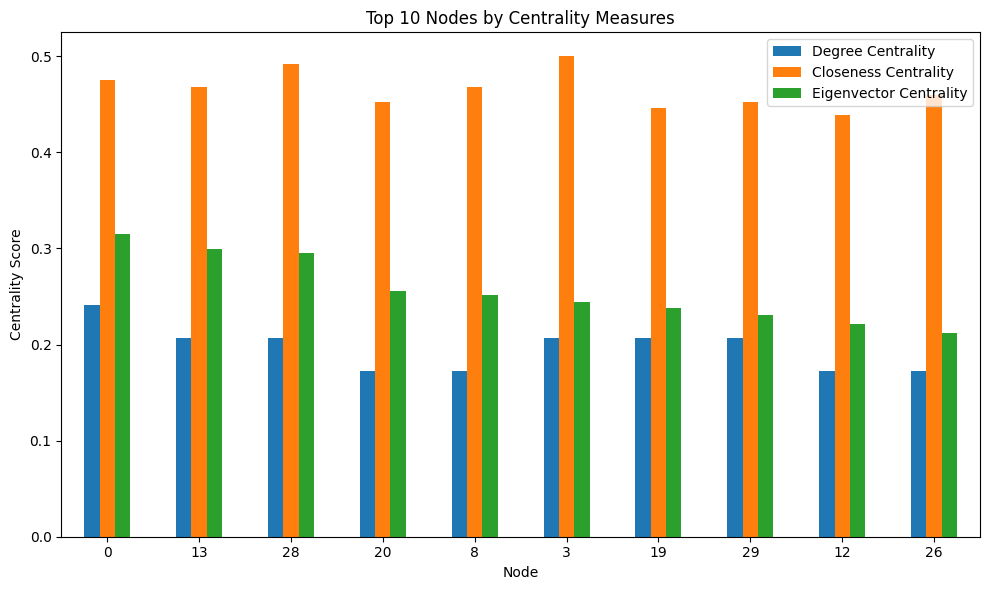

In [ ]:
import matplotlib.pyplot as plt

# Top 10 nodes by eigenvector centrality
top_nodes = centrality_df.head(10)

top_nodes[['Degree Centrality', 'Closeness Centrality', 'Eigenvector Centrality']].plot(
    kind='bar', figsize=(10, 6)
)
plt.title("Top 10 Nodes by Centrality Measures")
plt.ylabel("Centrality Score")
plt.xlabel("Node")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


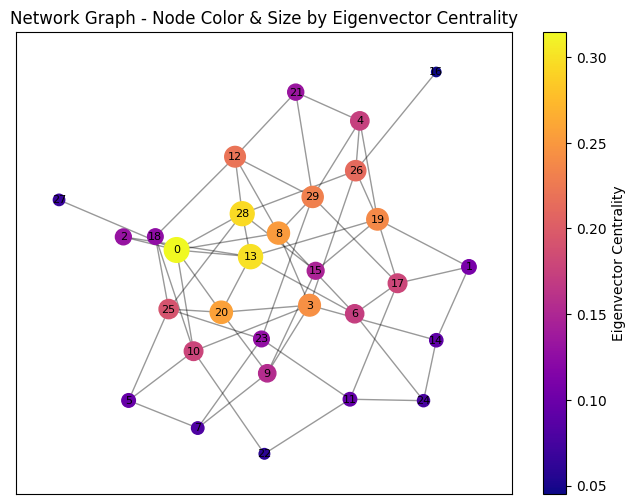

In [ ]:
pos = nx.spring_layout(G, seed=42)
eigenvector = nx.eigenvector_centrality(G)

# Normalize centrality for visualization
node_color = [eigenvector[n] for n in G.nodes()]
node_size = [1000 * eigenvector[n] for n in G.nodes()]

plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=plt.cm.plasma, node_size=node_size)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='Eigenvector Centrality')
plt.title("Network Graph - Node Color & Size by Eigenvector Centrality")
plt.show()


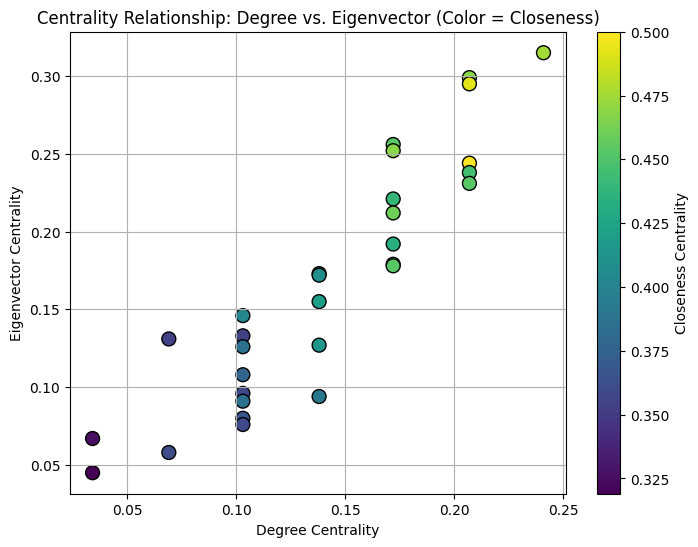

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    centrality_df['Degree Centrality'],
    centrality_df['Eigenvector Centrality'],
    c=centrality_df['Closeness Centrality'],
    cmap='viridis',
    s=100,
    edgecolor='k'
)
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.title('Centrality Relationship: Degree vs. Eigenvector (Color = Closeness)')
cbar = plt.colorbar()
cbar.set_label('Closeness Centrality')
plt.grid(True)
plt.show()
